In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

| Feature                  | Explanation                                               | Measurement      | Range               |
|--------------------------|-----------------------------------------------------------|------------------|---------------------|
| Age                      | Age of the patient                                        | Years            | [40,..., 95]        |
| Anaemia                  | Decrease of red blood cells or hemoglobin                 | Boolean          | 0, 1                |
| Creatinine phosphokinase | Level of the CPK enzyme in the blood                      | mcg/L            | [23,..., 7861]      |
| Diabetes                 | If the patient has diabetes                               | Boolean          | 0, 1                |
| Ejection fraction        | Percentage of blood leaving the heart at each contraction | Percentage       | [14,..., 80]        |
| High blood pressure      | If a patient has hypertension                             | Boolean          | 0, 1                |
| Platelets                | Platelets in the blood                                    | kiloplatelets/mL | [25.01,..., 850.00] |
| Serum creatinine         | Level of creatinine in the blood                          | mg/dL            | [0.50,..., 9.40]    |
| Serum sodium             | Level of sodium in the blood                              | mEq/L            | [114,..., 148]      |
| Sex                      | Woman or man                                              | Binary           | 0, 1                |
| Smoking                  | If the patient smokes                                     | Boolean          | 0, 1                |
| Time                     | Follow-up period                                          | Days             | [4,...,285]         |
| Death event (target)     | If the patient died during the follow-up period           | Boolean          | 0, 1                |

In [2]:
DATA_PATH = "Dados/heart_failure_clinical_records_dataset.csv"
heart_df = pd.read_csv(DATA_PATH)
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
heart_df.shape

(299, 13)

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [22]:
heart_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
heart_df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Não morreram: 67.89% dos casos
Morreram: 32.11% dos casos
Proporção: 2.11


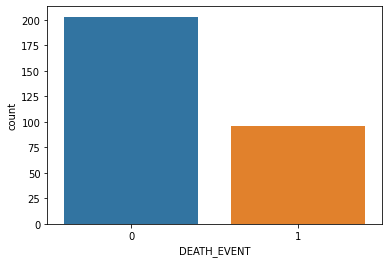

In [21]:
sns.countplot(data=heart_df, x='DEATH_EVENT')
valores = heart_df.DEATH_EVENT.value_counts().values
print('Não morreram: {:.2f}% dos casos'.format(valores[0]/(valores[1]+valores[0])*100))
print('Morreram: {:.2f}% dos casos'.format(valores[1]/(valores[1]+valores[0])*100))
print('Proporção: {:.2f}'.format(valores[0]/valores[1]))

<AxesSubplot:>

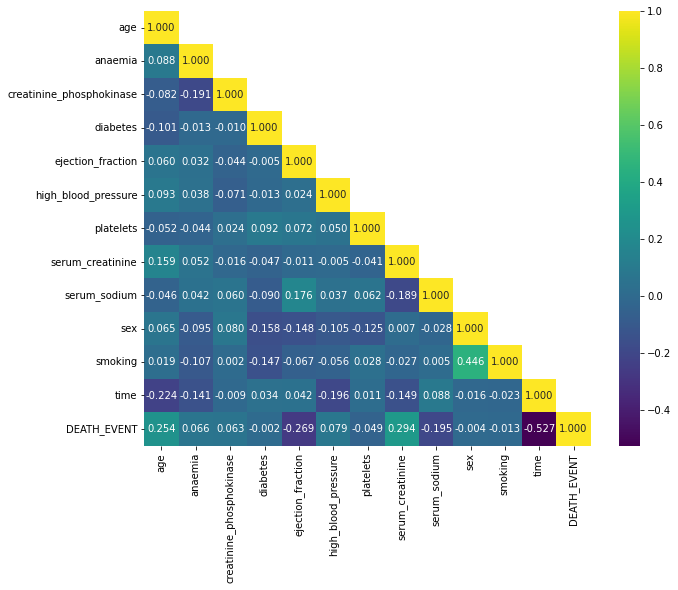

In [39]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones(heart_df.corr().shape[0]))
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if i==j:
            mask[i,j] = 0
        else:
            continue
sns.heatmap(heart_df.corr(), annot=True, cmap='viridis', fmt='.3f', mask=mask)